In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_17564\233084069.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df =pd.read_csv(r'credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


## Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [4]:
df['TARGET'].value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

In [5]:
# droped_features= ['Unnamed: 0', 'ID', 'FLAG_MOBIL', 'INCOME_TYPE',
#            'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
# df.drop(droped_features, axis=1, inplace=True)


#### Gender

In [6]:
df['GENDER'].value_counts()

GENDER
F    15630
M     9504
Name: count, dtype: int64

In [7]:
df['GENDER']=[0 if x=='F' else 1 for x in df['GENDER']]

In [8]:
df['GENDER'].value_counts()

GENDER
0    15630
1     9504
Name: count, dtype: int64

#### CAR

In [9]:
df['CAR'].value_counts()

CAR
N    14618
Y    10516
Name: count, dtype: int64

In [10]:
df['CAR']=[0 if x=='N' else 1 for x in df['CAR']]

In [11]:
df['CAR'].value_counts()

CAR
0    14618
1    10516
Name: count, dtype: int64

### Reality

In [12]:
df['REALITY'].value_counts()

REALITY
Y    16461
N     8673
Name: count, dtype: int64

In [13]:
df['REALITY']=[0 if x=='N' else 1 for x in df['REALITY']]

In [14]:
df['REALITY'].value_counts()

REALITY
1    16461
0     8673
Name: count, dtype: int64

#### One Hot Encoding (INCOME_TYPE , EDUCATION_TYPE , FAMILY_TYPE , HOUSE_TYPE)

In [15]:
df.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [16]:
df = pd.get_dummies(df , columns=['INCOME_TYPE', 'EDUCATION_TYPE','FAMILY_TYPE','HOUSE_TYPE'] )

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    25134 non-null  int64  
 1   ID                                            25134 non-null  int64  
 2   GENDER                                        25134 non-null  int64  
 3   CAR                                           25134 non-null  int64  
 4   REALITY                                       25134 non-null  int64  
 5   NO_OF_CHILD                                   25134 non-null  int64  
 6   INCOME                                        25134 non-null  float64
 7   FLAG_MOBIL                                    25134 non-null  int64  
 8   WORK_PHONE                                    25134 non-null  int64  
 9   PHONE                                         25134 non-null 

In [18]:
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,...,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,5008806,1,1,1,0,112500.0,1,0,0,...,True,False,False,False,False,True,False,False,False,False
1,1,5008808,0,0,1,0,270000.0,1,0,1,...,False,False,True,False,False,True,False,False,False,False
2,2,5008809,0,0,1,0,270000.0,1,0,1,...,False,False,True,False,False,True,False,False,False,False
3,3,5008810,0,0,1,0,270000.0,1,0,1,...,False,False,True,False,False,True,False,False,False,False
4,4,5008811,0,0,1,0,270000.0,1,0,1,...,False,False,True,False,False,True,False,False,False,False


In [19]:
to_drop = ['Unnamed: 0', 'ID']
df.drop(to_drop, axis=1, inplace=True)

In [20]:
df.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,...,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1,1,1,0,112500.0,1,0,0,0,2.0,...,True,False,False,False,False,True,False,False,False,False
1,0,0,1,0,270000.0,1,0,1,1,1.0,...,False,False,True,False,False,True,False,False,False,False
2,0,0,1,0,270000.0,1,0,1,1,1.0,...,False,False,True,False,False,True,False,False,False,False
3,0,0,1,0,270000.0,1,0,1,1,1.0,...,False,False,True,False,False,True,False,False,False,False
4,0,0,1,0,270000.0,1,0,1,1,1.0,...,False,False,True,False,False,True,False,False,False,False


#### Scaling 

In [21]:
# check on the colunms that 
to_scale = [col for col in df.columns if df[col].max() > 1]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

In [22]:
# Replace original columns with scaled ones
for col in scaled:
    df[col] = scaled[col]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   GENDER                                        25134 non-null  int64  
 1   CAR                                           25134 non-null  int64  
 2   REALITY                                       25134 non-null  int64  
 3   NO_OF_CHILD                                   25134 non-null  float64
 4   INCOME                                        25134 non-null  float64
 5   FLAG_MOBIL                                    25134 non-null  int64  
 6   WORK_PHONE                                    25134 non-null  int64  
 7   PHONE                                         25134 non-null  int64  
 8   E_MAIL                                        25134 non-null  int64  
 9   FAMILY SIZE                                   25134 non-null 

In [24]:
x=df.drop(columns='TARGET')
x.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,...,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1,1,1,0.0,0.055233,1,0,0,0,0.052632,...,True,False,False,False,False,True,False,False,False,False
1,0,0,1,0.0,0.156977,1,0,1,1,0.000000,...,False,False,True,False,False,True,False,False,False,False
2,0,0,1,0.0,0.156977,1,0,1,1,0.000000,...,False,False,True,False,False,True,False,False,False,False
3,0,0,1,0.0,0.156977,1,0,1,1,0.000000,...,False,False,True,False,False,True,False,False,False,False
4,0,0,1,0.0,0.156977,1,0,1,1,0.000000,...,False,False,True,False,False,True,False,False,False,False


In [25]:
y=df['TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Using Random Forest classifier

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9818977521384523


Accuracy = 0.98
Recall = 0.08



<Axes: >

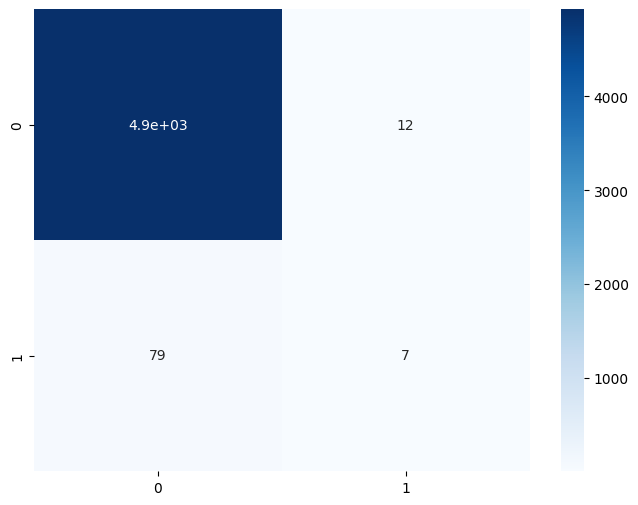

In [29]:
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')

#### An idea i have found in kaggle to improve the recall 

In [30]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(x, y)

In [31]:
y_sm.value_counts(normalize=True) * 100

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

modeling again but wth useing oversampling

In [32]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)

Accuracy = 0.99
Recall = 0.99



<Axes: title={'center': 'Confusion Matrix (with SMOTE)'}>

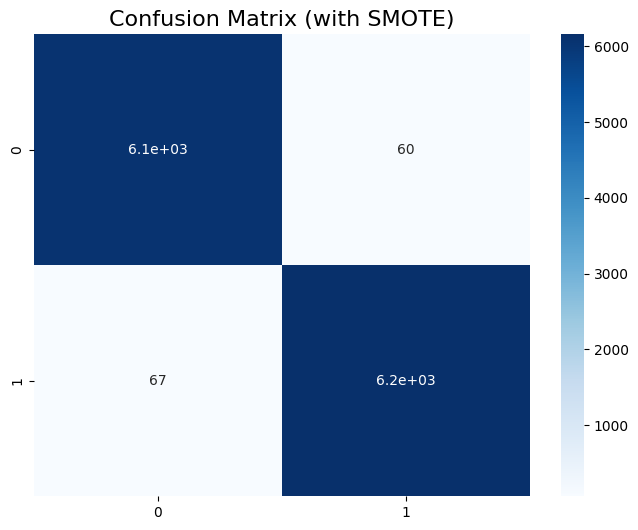

In [33]:
print(f'Accuracy = {accuracy_score(y_test, preds2):.2f}\nRecall = {recall_score(y_test, preds2):.2f}\n')
cm = confusion_matrix(y_test, preds2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')